<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_4_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.776363,62.141234,94.879257,0.786228,199.583081,197.316958,2.266123
1,0.0,1.0,46.844829,94.370598,48.304240,-9.766094,189.753572,196.409619,-6.656047
2,0.0,2.0,51.338855,59.560494,43.306653,5.370924,169.576925,163.022329,6.554596
3,0.0,3.0,82.638500,90.399364,45.291731,-1.920665,226.408931,227.086175,-0.677244
4,0.0,4.0,24.421085,62.320292,35.603040,-1.678589,130.665827,129.619865,1.045963
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.968026,84.888617,58.945364,-12.392050,205.409957,217.882442,-12.472486
29996,999.0,26.0,99.454714,41.927944,78.090249,-9.586677,219.886230,227.276153,-7.389923
29997,999.0,27.0,73.604598,66.140428,31.335365,4.658764,185.739156,181.260989,4.478167
29998,999.0,28.0,90.602145,56.440041,46.562467,-0.612434,202.992218,202.664290,0.327928


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.776363,62.141234,94.879257,0.786228,199.583081,197.316958,2.266123
1,0.0,1.0,46.844829,94.370598,48.304240,-9.766094,189.753572,196.409619,-6.656047
2,0.0,2.0,51.338855,59.560494,43.306653,5.370924,169.576925,163.022329,6.554596
3,0.0,3.0,82.638500,90.399364,45.291731,-1.920665,226.408931,227.086175,-0.677244
4,0.0,4.0,24.421085,62.320292,35.603040,-1.678589,130.665827,129.619865,1.045963
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.968026,84.888617,58.945364,-12.392050,205.409957,217.882442,-12.472486
29996,999.0,26.0,99.454714,41.927944,78.090249,-9.586677,219.886230,227.276153,-7.389923
29997,999.0,27.0,73.604598,66.140428,31.335365,4.658764,185.739156,181.260989,4.478167
29998,999.0,28.0,90.602145,56.440041,46.562467,-0.612434,202.992218,202.664290,0.327928


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    31.776363  62.141234  94.879257  ...  199.583081  197.316958   2.266123
      1.0    46.844829  94.370598  48.304240  ...  189.753572  196.409619  -6.656047
      2.0    51.338855  59.560494  43.306653  ...  169.576925  163.022329   6.554596
      3.0    82.638500  90.399364  45.291731  ...  226.408931  227.086175  -0.677244
      4.0    24.421085  62.320292  35.603040  ...  130.665827  129.619865   1.045963
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   63.968026  84.888617  58.945364  ...  205.409957  217.882442 -12.472486
      26.0   99.454714  41.927944  78.090249  ...  219.886230  227.276153  -7.389923
      27.0   73.604598  66.140428  31.335365  ...  185.739156  181.260989   4.478167
      28.0   90.602145  56.440041  46.562467  ...  202.992218  202.664290   0.327928
      29.0   98.137650  97.354211  36.336523  ...  242.048345  241.286061   0.762283

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    31.776363  62.141234  94.879257  ...  199.583081  197.316958   2.266123
      1.0    46.844829  94.370598  48.304240  ...  189.753572  196.409619  -6.656047
      2.0    51.338855  59.560494  43.306653  ...  169.576925  163.022329   6.554596
      3.0    82.638500  90.399364  45.291731  ...  226.408931  227.086175  -0.677244
      4.0    24.421085  62.320292  35.603040  ...  130.665827  129.619865   1.045963
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   63.968026  84.888617  58.945364  ...  205.409957  217.882442 -12.472486
      26.0   99.454714  41.927944  78.090249  ...  219.886230  227.276153  -7.389923
      27.0   73.604598  66.140428  31.335365  ...  185.739156  181.260989   4.478167
      28.0   90.602145  56.440041  46.562467  ...  202.992218  202.664290   0.327928
      29.0   98.137650  97.354211  36.336523  ...  242.048345  241.286061   0.762283

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.776363,62.141234,94.879257,0.786228,199.583081,197.316958,2.266123
1,0.0,1.0,46.844829,94.370598,48.304240,-9.766094,189.753572,196.409619,-6.656047
2,0.0,2.0,51.338855,59.560494,43.306653,5.370924,169.576925,163.022329,6.554596
3,0.0,3.0,82.638500,90.399364,45.291731,-1.920665,226.408931,227.086175,-0.677244
4,0.0,4.0,24.421085,62.320292,35.603040,-1.678589,130.665827,129.619865,1.045963
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.968026,84.888617,58.945364,-12.392050,205.409957,217.882442,-12.472486
29996,999.0,26.0,99.454714,41.927944,78.090249,-9.586677,219.886230,227.276153,-7.389923
29997,999.0,27.0,73.604598,66.140428,31.335365,4.658764,185.739156,181.260989,4.478167
29998,999.0,28.0,90.602145,56.440041,46.562467,-0.612434,202.992218,202.664290,0.327928


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    31.776363  62.141234  94.879257  ...  199.583081  197.316958   2.266123
      1.0    46.844829  94.370598  48.304240  ...  189.753572  196.409619  -6.656047
      2.0    51.338855  59.560494  43.306653  ...  169.576925  163.022329   6.554596
      3.0    82.638500  90.399364  45.291731  ...  226.408931  227.086175  -0.677244
      4.0    24.421085  62.320292  35.603040  ...  130.665827  129.619865   1.045963
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   63.968026  84.888617  58.945364  ...  205.409957  217.882442 -12.472486
      26.0   99.454714  41.927944  78.090249  ...  219.886230  227.276153  -7.389923
      27.0   73.604598  66.140428  31.335365  ...  185.739156  181.260989   4.478167
      28.0   90.602145  56.440041  46.562467  ...  202.992218  202.664290   0.327928
      29.0   98.137650  97.354211  36.336523  ...  242.048345  241.286061   0.762283

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

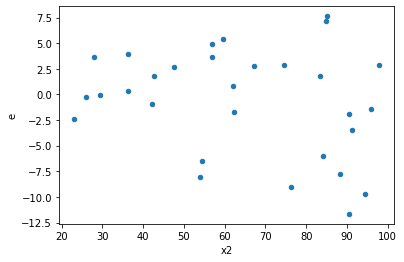

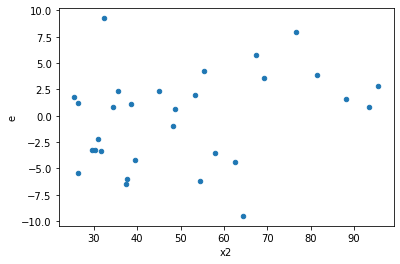

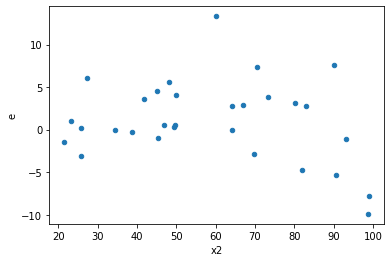

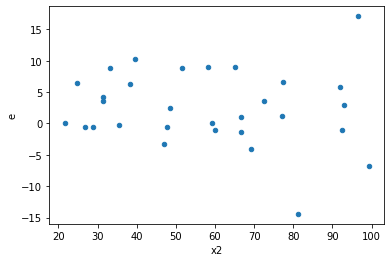

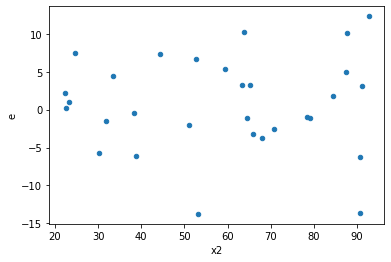

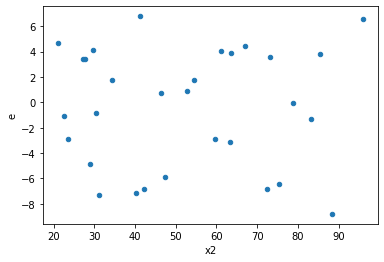

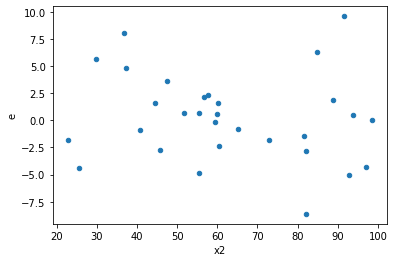

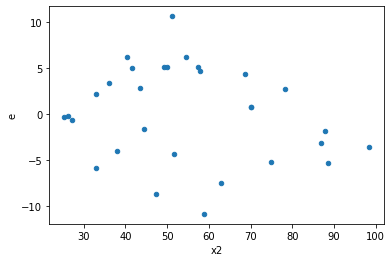

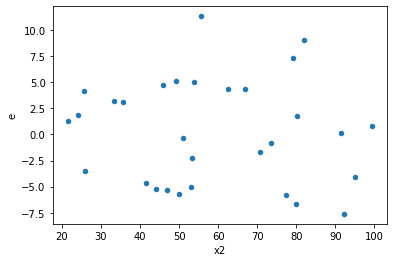

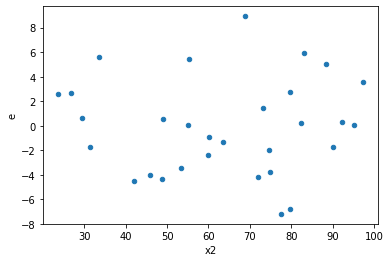

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,327.32583933979174,159.4160322826382,40.91572991747397,19.927004035329777,2.0532805556184974,0.29881750048902767,0.8505912497554862,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,201.5395275711637,159.94246053639,25.19244094639546,19.99280756704875,1.2600751976384006,0.7361824444947696,0.6319087777526152,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,231.2006638547273,73.74053688277509,28.900082981840914,9.217567110346886,3.135326560237359,0.10391606333079206,0.948041968334604,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,438.98010927326237,152.65326214448746,54.872513659157796,19.081657768060932,2.8756680539048323,0.13146497781980582,0.9342675110900971,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,384.87652726938524,86.89922687338628,48.109565908673154,10.862403359173285,4.428998290515946,0.03711871175100523,0.9814406441244974,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,260.99454886789266,146.50151046502617,32.62431860848658,18.31268880812827,1.7815143887557325,0.402629247849297,0.7986853760753515,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,212.12300217423987,168.45595173202042,26.515375271779984,21.056993966502553,1.2592193982655178,0.736927415618549,0.6315362921907255,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,268.3023739793549,166.31985674689366,33.537796747419364,20.789982093361708,1.6131710261611079,0.48736557327032526,0.7563172133648374,Reject001=1 : Homoscedasticity
9.0,9.0,9.0,112.95448490406028,82.69190927669108,14.119310613007535,10.336488659586385,1.365967794093485,0.6497462449140454,0.6751268775429773,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,327.32583933979174,159.4160322826382,40.91572991747397,19.927004035329777,2.0532805556184974,0.29881750048902767,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,201.5395275711637,159.94246053639,25.19244094639546,19.99280756704875,1.2600751976384006,1.2638175555052304,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,231.2006638547273,73.74053688277509,28.900082981840914,9.217567110346886,3.135326560237359,0.10391606333079206,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,438.98010927326237,152.65326214448746,54.872513659157796,19.081657768060932,2.8756680539048323,0.13146497781980582,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,384.87652726938524,86.89922687338628,48.109565908673154,10.862403359173285,4.428998290515946,0.03711871175100523,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,260.99454886789266,146.50151046502617,32.62431860848658,18.31268880812827,1.7815143887557325,0.402629247849297,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,212.12300217423987,168.45595173202042,26.515375271779984,21.056993966502553,1.2592193982655178,1.263072584381451,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,101.58443322144899,164.91354859554295,12.698054152681124,20.61419357444287,0.6159859762073816,0.48167429770287623,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,268.3023739793549,166.31985674689366,33.537796747419364,20.789982093361708,1.6131710261611079,0.48736557327032526,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      942
Reject001=0 : Heteroscedasticity     58
Name: Result_test, dtype: int64